Signal to Noise Ratio (SNR) is given by the formula

$$\frac{S}{N}=\frac{Fqt}{\sqrt{Fqt+Bqt+Tht+R^2}}$$

with the value of $B$ and $F$:

$B=N_pτ\frac{π}{4}D^2(1-ϵ^2)Δλ10^{-\frac{m_B}{2,5}}(\frac{π}{4}θ^2)$

$F=N_pτ\frac{π}{4}D^2(1-ϵ^2)Δλ10^{-\frac{m}{2,5}}$

We assume the thermal noise ($Th$) to be zero

$$\frac{S}{N}=\frac{Fqt}{\sqrt{Fqt+Bqt+R^2}}$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Variables
R       = 4       # readout noise
q       = 0.8     # quantum efficiency
m_B     = 19.03   # mean sky brightness (mag/arcsec^2)
theta   = 2       # seeing size (arcsec)
tau     = 0.192   # transmission efficiency
D       = 20      # telescope diameter (cm)
epsilon = 0.37    # obscuration factor
dlambda = 99.1    # filter bandpass
N_p     = 10000   # number of incoming photon for 0 magnitude star
                  # observed at 550 nm (photons s−1cm−2nm−1)
pi      = np.pi

# Formula
B = N_p * tau * pi/4 * D**2 * (1-epsilon**2) * dlambda * 10**(-m_B/2.5) * pi/4 * theta**2

def SN(t, m):
  F = N_p * tau * pi/4 * D**2 * (1-epsilon**2) * dlambda * 10**(-m/2.5)
  sn = F*q*t / (F*q*t + B*q*t + R**2)**0.5
  return sn

def t(m):
  time = 0
  while SN(time, m) <= 100:
    time += 0.000001
  return time

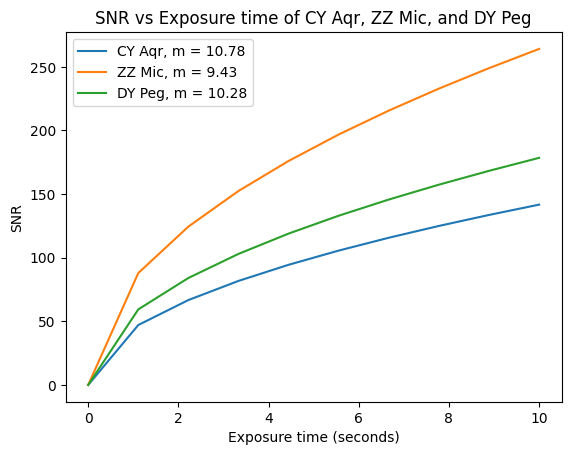

In [ ]:
# Plot SNR vs exposure time (seconds) of CY Aqr, ZZ Mic, and DY Peg

x = np.linspace(0, 10, 10)
y_CYAqr = SN(x, 10.78)
y_ZZMic = SN(x, 9.43)
y_DYPeg = SN(x, 10.28)
plt.plot(x, y_CYAqr, label='CY Aqr, m = 10.78')
plt.plot(x, y_ZZMic, label='ZZ Mic, m = 9.43')
plt.plot(x, y_DYPeg, label='DY Peg, m = 10.28')
plt.xlabel('Exposure time (seconds)')
plt.ylabel('SNR')
plt.title('SNR vs Exposure time of CY Aqr, ZZ Mic, and DY Peg')
plt.legend()
plt.show()

In [ ]:
# Estimated exposure time of CY Aqr, ZZ Mic, and DY Peg
CYAqr = t(10.78)
ZZMic = t(9.43)
DYPeg = t(10.28)

print(CYAqr)
print(ZZMic)
print(DYPeg)

4.985383000342942
1.4361969999720336
3.143745000085522


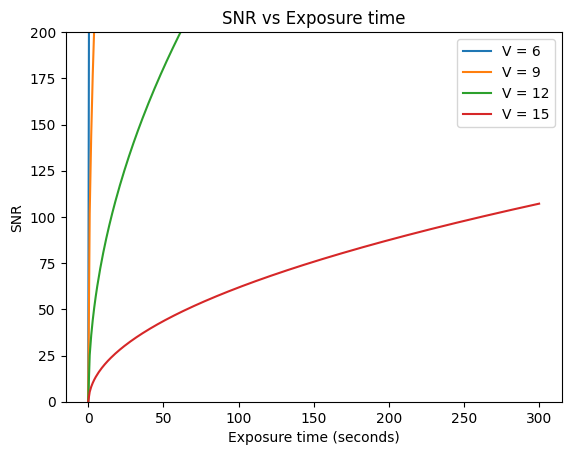

In [ ]:
# Plot SNR vs exposure time (seconds) of V_1 = 6, V_2 = 9, V_3 = 12, V_4 = 15

x = np.linspace(0, 300, 300)
y_V1 = SN(x, 6)
y_V2 = SN(x, 9)
y_V3 = SN(x, 12)
y_V4 = SN(x, 15)
plt.plot(x, y_V1, label='V = 6')
plt.plot(x, y_V2, label='V = 9')
plt.plot(x, y_V3, label='V = 12')
plt.plot(x, y_V4, label='V = 15')
plt.ylim(0, 200)
plt.xlabel('Exposure time (seconds)')
plt.ylabel('SNR')
plt.title('SNR vs Exposure time')
plt.legend()
plt.show()

In [ ]:
# Estimated exposure time of V_1 = 6, V_2 = 9, V_3 = 12, V_4 = 15
V1 = t(6)
V2 = t(9)
V3 = t(12)
V4 = t(15)

print(V1)
print(V2)
print(V3)
print(V4)

0.060958000000040306
0.9663840000069516
15.385410995237073
261.2415244324452
